# Classification - Customer Churn in Telecom Segment

## Loading data from S3 bucket

In [0]:
import urllib
ACCESS_KEY = "" # removed for security
SECRET_KEY = "" # removed for security
ENCODED_SECRET_KEY = urllib.parse.quote(SECRET_KEY, "")
AWS_BUCKET_NAME = "athulsbucket"
MOUNT_NAME = "s3data"
dbutils.fs.mount("s3n://%s:%s@%s" % (ACCESS_KEY, ENCODED_SECRET_KEY, AWS_BUCKET_NAME), "/mnt/%s" % MOUNT_NAME)

Out[89]: True

In [0]:
# File location and type
file_location = "dbfs:/mnt/s3data/listing.csv"
file_type = "csv"

# CSV options
infer_schema = "true"
first_row_is_header = "true"
delimiter = ","

# The applied options are for CSV files. For other file types, these will be ignored.
df = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .option("nanValue",' ') \
  .option("nullValue",' ') \
  .load(file_location)

display(df)

customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.7,151.65,Yes
9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.1,1949.4,No
6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.8,3046.05,Yes
6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


## Exploratory Data Analysis

In [0]:
df.printSchema()

root
-- customerID: string (nullable = true)
-- gender: string (nullable = true)
-- SeniorCitizen: integer (nullable = true)
-- Partner: string (nullable = true)
-- Dependents: string (nullable = true)
-- tenure: integer (nullable = true)
-- PhoneService: string (nullable = true)
-- MultipleLines: string (nullable = true)
-- InternetService: string (nullable = true)
-- OnlineSecurity: string (nullable = true)
-- OnlineBackup: string (nullable = true)
-- DeviceProtection: string (nullable = true)
-- TechSupport: string (nullable = true)
-- StreamingTV: string (nullable = true)
-- StreamingMovies: string (nullable = true)
-- Contract: string (nullable = true)
-- PaperlessBilling: string (nullable = true)
-- PaymentMethod: string (nullable = true)
-- MonthlyCharges: double (nullable = true)
-- TotalCharges: double (nullable = true)
-- Churn: string (nullable = true)

In [0]:
from pyspark.sql.functions import isnan, when, count, col
display(df.select([count(when(isnan(x)| col(x).isNull(),1)).alias(x) for x in df.columns]))

customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,0


In [0]:
temp_table = 'churn_analysis'
df.createOrReplaceTempView(temp_table)

In [0]:
pd_df = df.toPandas()

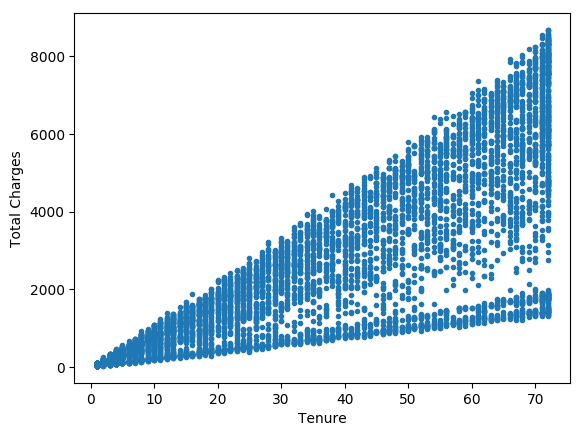

In [0]:
import matplotlib.pyplot as plt
plt.clf()
plt.plot(pd_df['tenure'],pd_df['TotalCharges'],'.')
plt.xlabel('Tenure')
plt.ylabel('Total Charges')
display()

In [0]:
%sql
select * from churn_analysis

customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.7,151.65,Yes
9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.1,1949.4,No
6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.8,3046.05,Yes
6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [0]:
# Distribution of outcomes
%sql
select churn,count(*)count from churn_analysis group by churn

churn,count
No,5174
Yes,1869


In [0]:
# Statistics of tenure, TotalCharges and Monthly Charges
df.select(['tenure','TotalCharges','MonthlyCharges']).describe().show()

+-------+------------------+------------------+------------------+
summary| tenure| TotalCharges| MonthlyCharges|
+-------+------------------+------------------+------------------+
 count| 7043| 7032| 7043|
 mean| 32.37114865824223|2283.3004408418697| 64.76169246059922|
 stddev|24.559481023094442| 2266.771361883145|30.090047097678482|
 min| 0| 18.8| 18.25|
 max| 72| 8684.8| 118.75|
+-------+------------------+------------------+------------------+

In [0]:
# Distribution of outcome by gender 
%sql
select gender,churn,count(*) count from churn_analysis group by gender,churn

gender,churn,count
Male,No,2625
Male,Yes,930
Female,No,2549
Female,Yes,939


In [0]:
# distribution of outcome by SeniorCitizen indicator
%sql
select a.SeniorCitizen,a.churn,round((a.count/(b.count * 1.0)) * 100,2) perc from
(select SeniorCitizen,churn,count(*) count from churn_analysis group by SeniorCitizen,churn)a,
(select SeniorCitizen,count(*) count from churn_analysis group by SeniorCitizen)b
where a.SeniorCitizen = b.SeniorCitizen


SeniorCitizen,churn,perc
1,No,58.32
0,No,76.39
0,Yes,23.61
1,Yes,41.68


In [0]:
# distribution of churn outcome by tenure
%sql
select cast(tenure as int) tenure,churn,count(*) count from churn_analysis group by tenure,churn order by cast(tenure as int)

tenure,churn,count
0,No,11
1,No,233
1,Yes,380
2,No,115
2,Yes,123
3,Yes,94
3,No,106
4,No,93
4,Yes,83
5,Yes,64


In [0]:
%sql
select tenure,churn,count(*) count from churn_analysis where churn = 'Yes' group by tenure,churn order by 3 desc

tenure,churn,count
1,Yes,380
2,Yes,123
3,Yes,94
4,Yes,83
5,Yes,64
7,Yes,51
9,Yes,46
10,Yes,45
8,Yes,42
6,Yes,40


In [0]:
df.stat.crosstab('SeniorCitizen','InternetService').show()

+-----------------------------+----+-----------+----+
SeniorCitizen_InternetService| DSL|Fiber optic| No|
+-----------------------------+----+-----------+----+
 1| 259| 831| 52|
 0|2162| 2265|1474|
+-----------------------------+----+-----------+----+

In [0]:
#Distribution of outcome by PaperlessBiliing ind
%sql
select PaperlessBilling,churn,count(*) count from churn_analysis group by PaperlessBilling,churn

PaperlessBilling,churn,count
Yes,Yes,1400
No,No,2403
Yes,No,2771
No,Yes,469


In [0]:
#Distribution of outcome by PaymentMethods 
%sql
select PaymentMethod,churn,count(*) count from churn_analysis group by PaymentMethod,churn

PaymentMethod,churn,count
Credit card (automatic),No,1290
Bank transfer (automatic),No,1286
Mailed check,Yes,308
Credit card (automatic),Yes,232
Electronic check,No,1294
Electronic check,Yes,1071
Bank transfer (automatic),Yes,258
Mailed check,No,1304


In [0]:
churn_df = df
(train_data,test_data) = churn_df.randomSplit([0.7,0.3],24)
print('Train Dataset count: ' + str(train_data.count()) )
print('Test Dataset count: ' + str(test_data.count()) )

Train Dataset count: 4916
Test Dataset count: 2127

## Classification Model

In [0]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import OneHotEncoderEstimator,StringIndexer,VectorAssembler,Imputer,QuantileDiscretizer
catColumns =['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']

stages = []
for x in catColumns:
  Indexer = StringIndexer(inputCol = x,outputCol = x + '_index')
  Encoder = OneHotEncoderEstimator(inputCols = [Indexer.getOutputCol()],outputCols = [x+'_catVec'])
  stages += [Indexer,Encoder]

imputer = Imputer(inputCols = ['TotalCharges'],outputCols = ['OutTotalCharges'])
stages = stages + [imputer]

label_idx = StringIndexer(inputCol = 'Churn',outputCol = 'label')
stages = stages + [label_idx]

qd = QuantileDiscretizer(numBuckets = 3,inputCol = 'tenure',outputCol = 'tenureBin')
stages = stages + [qd]

numericCols = ['tenureBin','OutTotalCharges','MonthlyCharges']
assembleInputs = [x + '_catVec' for x in catColumns] + numericCols
assembler = VectorAssembler(inputCols = assembleInputs,outputCol = 'features')
stages = stages + [assembler]

In [0]:
pipeline = Pipeline().setStages(stages)
pipelineModel = pipeline.fit(train_data)
trainprepDf = pipelineModel.transform(train_data)
testprepDf = pipelineModel.transform(test_data)

Exception ignored in: <function JavaWrapper.__del__ at 0x7f5460db8f28>
Traceback (most recent call last):
 File "/databricks/spark/python/pyspark/ml/wrapper.py", line 40, in __del__
 if SparkContext._active_spark_context and self._java_obj is not None:
AttributeError: 'LogisticRegression' object has no attribute '_java_obj'

In [0]:
trainprepDf.printSchema()

root
-- customerID: string (nullable = true)
-- gender: string (nullable = true)
-- SeniorCitizen: integer (nullable = true)
-- Partner: string (nullable = true)
-- Dependents: string (nullable = true)
-- tenure: integer (nullable = true)
-- PhoneService: string (nullable = true)
-- MultipleLines: string (nullable = true)
-- InternetService: string (nullable = true)
-- OnlineSecurity: string (nullable = true)
-- OnlineBackup: string (nullable = true)
-- DeviceProtection: string (nullable = true)
-- TechSupport: string (nullable = true)
-- StreamingTV: string (nullable = true)
-- StreamingMovies: string (nullable = true)
-- Contract: string (nullable = true)
-- PaperlessBilling: string (nullable = true)
-- PaymentMethod: string (nullable = true)
-- MonthlyCharges: double (nullable = true)
-- TotalCharges: double (nullable = true)
-- Churn: string (nullable = true)
-- gender_index: double (nullable = false)
-- gender_catVec: vector (nullable = true)
-- SeniorCitizen_index: double (nullable = false)
-- SeniorCitizen_catVec: vector (nullable = true)
-- Partner_index: double (nullable = false)
-- Partner_catVec: vector (nullable = true)
-- Dependents_index: double (nullable = false)
-- Dependents_catVec: vector (nullable = true)
-- PhoneService_index: double (nullable = false)
-- PhoneService_catVec: vector (nullable = true)
-- MultipleLines_index: double (nullable = false)
-- MultipleLines_catVec: vector (nullable = true)
-- InternetService_index: double (nullable = false)
-- InternetService_catVec: vector (nullable = true)
-- OnlineSecurity_index: double (nullable = false)
-- OnlineSecurity_catVec: vector (nullable = true)
-- OnlineBackup_index: double (nullable = false)
-- OnlineBackup_catVec: vector (nullable = true)
-- DeviceProtection_index: double (nullable = false)
-- DeviceProtection_catVec: vector (nullable = true)
-- TechSupport_index: double (nullable = false)
-- TechSupport_catVec: vector (nullable = true)
-- StreamingTV_index: double (nullable = false)
-- StreamingTV_catVec: vector (nullable = true)
-- StreamingMovies_index: double (nullable = false)
-- StreamingMovies_catVec: vector (nullable = true)
-- Contract_index: double (nullable = false)
-- Contract_catVec: vector (nullable = true)
-- PaperlessBilling_index: double (nullable = false)
-- PaperlessBilling_catVec: vector (nullable = true)
-- PaymentMethod_index: double (nullable = false)
-- PaymentMethod_catVec: vector (nullable = true)
-- OutTotalCharges: double (nullable = true)
-- label: double (nullable = false)
-- tenureBin: double (nullable = true)
-- features: vector (nullable = true)

In [0]:
from pyspark.ml.classification import LogisticRegression
lr = LogisticRegression(labelCol = 'label',featuresCol = 'features',maxIter=100)
lrModel = lr.fit(trainprepDf)

In [0]:
print('Coefficients:' + str(lrModel.coefficients))
print('Intercept:' + str(lrModel.intercept))

Coefficients:[0.01845496316541118,-0.16645483149478596,-0.026561569316146196,0.2112657055735041,0.49211114007899853,-0.17305751722396534,0.3544084208591697,1.401724707338326,-0.5286451846649257,0.6038029720189315,0.3703825022277563,0.4632046142635857,0.4927965582934568,0.3783018319559799,0.5858534759528183,0.5645057419413645,0.41068556083555136,0.15996820182181462,0.7896555810264463,0.1358211877236146,0.8120526318619083,0.883490639031604,-0.670515615572581,0.34353595386956826,0.29047850859099117,0.03798072636131646,-0.1871216453055586,-0.5532808491990393,-0.00012428838405438417,-0.03765611371605558]
Intercept:-2.085644290774787

In [0]:
summary = lrModel.summary

In [0]:
accuracy = summary.accuracy
falsePositiveRate = summary.weightedFalsePositiveRate
truePositiveRate = summary.weightedTruePositiveRate
fMeasure = summary.weightedFMeasure()
precision = summary.weightedPrecision
recall = summary.weightedRecall
print("Accuracy: %s\nFPR: %s\nTPR: %s\nF-measure: %s\nPrecision: %s\nRecall: %s\nAreaUnderROC: %s"
      % (accuracy, falsePositiveRate, truePositiveRate, fMeasure, precision, recall, summary.areaUnderROC))

Accuracy: 0.7990235964198535
FPR: 0.35317182033015265
TPR: 0.7990235964198535
F-measure: 0.7933388330866527
Precision: 0.7911248264814658
Recall: 0.7990235964198535
AreaUnderROC: 0.8473771815911286

In [0]:
display(lrModel, trainprepDf, "ROC")

False Positive Rate,True Positive Rate,Threshold
0.0,0.0,0.818481989912955
0.0,0.038461538461538464,0.818481989912955
0.015384615384615385,0.038461538461538464,0.7986124767706272
0.015384615384615385,0.07692307692307693,0.7467873180664831
0.015384615384615385,0.11538461538461539,0.7028674654488972
0.03076923076923077,0.11538461538461539,0.6924015096555654
0.03076923076923077,0.15384615384615385,0.6879460560614545
0.046153846153846156,0.15384615384615385,0.6378105856051989
0.046153846153846156,0.19230769230769232,0.6337799009139715
0.046153846153846156,0.23076923076923078,0.6233168194462075


In [0]:
display(lrModel, trainprepDf, "fittedVsResiduals")

fitted values,residuals
-0.16001061671723438,-0.4600824781807761
-3.0222563925493957,-0.04643047114691238
-2.163488687493271,-0.10307746664702333
-3.395416242507823,-0.03243902595282475
0.5029774554264699,0.3768412112709937
-1.1706252455234143,0.7632580131991202
-2.4494346230588673,-0.07947990393834989
-1.9349852371681167,-0.1261998157596942
-3.218614380398173,-0.03847120843269161
0.08116366698610011,0.4797202148574363


In [0]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
predictions = lrModel.transform(testprepDf)
evaluatorLR = BinaryClassificationEvaluator(rawPredictionCol="prediction")
area_under_curve = evaluatorLR.evaluate(predictions)

#default evaluation is areaUnderROC
print("areaUnderROC = %g" % area_under_curve)

evaluatorLR.getMetricName()

areaUnderROC = 0.71763
Out[81]: 'areaUnderROC'

In [0]:
from pyspark.mllib.evaluation import BinaryClassificationMetrics

results = predictions.select(['prediction', 'label'])
 
## prepare score-label set
results_collect = results.collect()
results_list = [(float(i[0]), float(i[1])) for i in results_collect]
predictionAndLabels = sc.parallelize(results_list)
 
metrics = BinaryClassificationMetrics(predictionAndLabels)

# Area under precision-recall curve
print("Area under PR = %s" % metrics.areaUnderPR)

# Area under ROC curve
print("Area under ROC = %s" % metrics.areaUnderROC)

predictions.show(1)

Area under PR = 0.523458738926126
Area under ROC = 0.7176298922189995
+----------+------+-------------+-------+----------+------+------------+-------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------+----------------+-------------+--------------+------------+-----+------------+-------------+-------------------+--------------------+-------------+--------------+----------------+-----------------+------------------+-------------------+-------------------+--------------------+---------------------+----------------------+--------------------+---------------------+------------------+-------------------+----------------------+-----------------------+-----------------+------------------+-----------------+------------------+---------------------+----------------------+--------------+---------------+----------------------+-----------------------+-------------------+--------------------+---------------+-----+---------+--------------------+--------------------+--------------------+----------+
customerID|gender|SeniorCitizen|Partner|Dependents|tenure|PhoneService|MultipleLines|InternetService|OnlineSecurity|OnlineBackup|DeviceProtection|TechSupport|StreamingTV|StreamingMovies|Contract|PaperlessBilling|PaymentMethod|MonthlyCharges|TotalCharges|Churn|gender_index|gender_catVec|SeniorCitizen_index|SeniorCitizen_catVec|Partner_index|Partner_catVec|Dependents_index|Dependents_catVec|PhoneService_index|PhoneService_catVec|MultipleLines_index|MultipleLines_catVec|InternetService_index|InternetService_catVec|OnlineSecurity_index|OnlineSecurity_catVec|OnlineBackup_index|OnlineBackup_catVec|DeviceProtection_index|DeviceProtection_catVec|TechSupport_index|TechSupport_catVec|StreamingTV_index|StreamingTV_catVec|StreamingMovies_index|StreamingMovies_catVec|Contract_index|Contract_catVec|PaperlessBilling_index|PaperlessBilling_catVec|PaymentMethod_index|PaymentMethod_catVec|OutTotalCharges|label|tenureBin| features| rawPrediction| probability|prediction|
+----------+------+-------------+-------+----------+------+------------+-------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------+----------------+-------------+--------------+------------+-----+------------+-------------+-------------------+--------------------+-------------+--------------+----------------+-----------------+------------------+-------------------+-------------------+--------------------+---------------------+----------------------+--------------------+---------------------+------------------+-------------------+----------------------+-----------------------+-----------------+------------------+-----------------+------------------+---------------------+----------------------+--------------+---------------+----------------------+-----------------------+-------------------+--------------------+---------------+-----+---------+--------------------+--------------------+--------------------+----------+
0002-ORFBO|Female| 0| Yes| Yes| 9| Yes| No| DSL| No| Yes| No| Yes| Yes| No|One year| Yes| Mailed check| 65.6| 593.3| No| 0.0|(1,[0],[1.0])| 0.0| (1,[0],[1.0])| 1.0| (1,[],[])| 1.0| (1,[],[])| 0.0| (1,[0],[1.0])| 0.0| (2,[0],[1.0])| 1.0| (2,[1],[1.0])| 0.0| (2,[0],[1.0])| 1.0| (2,[1],[1.0])| 0.0| (2,[0],[1.0])| 1.0| (2,[1],[1.0])| 1.0| (2,[1],[1.0])| 0.0| (2,[0],[1.0])| 2.0| (2,[],[])| 0.0| (1,[0],[1.0])| 1.0| (3,[1],[1.0])| 593.3| 0.0| 0.0|(30,[0,1,4,5,8,9,...|[1.79463670686190...|[0.85749481005087...| 0.0|
+----------+------+-------------+-------+----------+------+------------+-------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------+----------------+-------------+--------------+------------+-----+------------+-------------+-------------------+--------------------+-------------+--------------+----------------+-----------------+------------------+-------------------+-------------------+---------------

In [0]:
count=predictions.count()
correct = results.filter(results.prediction == results.label).count()
wrong = results.filter(results.prediction != results.label).count()
tp = results.filter(results.prediction == 1.0).filter(results.prediction == results.label).count()
fp = results.filter(results.prediction == 1.0).filter(results.prediction != results.label).count()
fn = results.filter(results.prediction == 0.0).filter(results.prediction != results.label).count()
tn = results.filter(results.prediction == 0.0).filter(results.prediction == results.label).count()

accuracy = (tp+tn)/count

precision = tp/(tp+fp)

recall = tp/(tp+fn)

print("Correct: %s\nWrong: %s\ntp: %s\nfp: %s\nfn: %s\ntn: %s\nAccuracy: %s\nPrecision: %s\nRecall: %s"
      % (correct, wrong, tp, fp, fn, tn, accuracy, precision, recall))

Correct: 1704
Wrong: 423
tp: 289
fp: 190
fn: 233
tn: 1415
Accuracy: 0.8011283497884344
Precision: 0.6033402922755741
Recall: 0.553639846743295

In [0]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

# Create ParamGrid for Cross Validation
paramGrid = (ParamGridBuilder()
             .addGrid(lr.regParam, [0.01, 0.5, 2.0])
             .addGrid(lr.elasticNetParam, [0.0, 0.5, 1.0])
             .addGrid(lr.maxIter, [5, 10, 20])
             .build())

cv = CrossValidator(estimator=lr, estimatorParamMaps=paramGrid, evaluator=evaluatorLR, numFolds=5)

# Run cross validations
cvModel = cv.fit(trainprepDf)


predictions = cvModel.bestModel.transform(testprepDf)


evaluatorLR.evaluate(predictions)

results = predictions.select(['prediction', 'label'])

count=predictions.count()
correct = results.filter(results.prediction == results.label).count()
wrong = results.filter(results.prediction != results.label).count()
tp = results.filter(results.prediction == 1.0).filter(results.prediction == results.label).count()
fp = results.filter(results.prediction == 1.0).filter(results.prediction != results.label).count()
fn = results.filter(results.prediction == 0.0).filter(results.prediction != results.label).count()
tn = results.filter(results.prediction == 0.0).filter(results.prediction == results.label).count()

accuracy = (tp+tn)/count

precision = tp/(tp+fp)

recall = tp/(tp+fn)

print("Correct: %s\nWrong: %s\ntp: %s\nfp: %s\nfn: %s\ntn: %s\nAccuracy: %s\nPrecision: %s\nRecall: %s"
      % (correct, wrong, tp, fp, fn, tn, accuracy, precision, recall))

Correct: 1713
Wrong: 414
tp: 293
fp: 185
fn: 229
tn: 1420
Accuracy: 0.8053596614950634
Precision: 0.6129707112970711
Recall: 0.5613026819923371

In [0]:
from pyspark.ml.classification import RandomForestClassifier

rf = RandomForestClassifier(labelCol="label", featuresCol="features").setImpurity("gini").setMaxDepth(6).setNumTrees(50).setFeatureSubsetStrategy("auto").setSeed(1010)

rfModel = rf.fit(trainprepDf)
predictions = rfModel.transform(testprepDf)

results = predictions.select(['prediction', 'label'])

count=predictions.count()
correct = results.filter(results.prediction == results.label).count()
wrong = results.filter(results.prediction != results.label).count()
tp = results.filter(results.prediction == 1.0).filter(results.prediction == results.label).count()
fp = results.filter(results.prediction == 1.0).filter(results.prediction != results.label).count()
fn = results.filter(results.prediction == 0.0).filter(results.prediction != results.label).count()
tn = results.filter(results.prediction == 0.0).filter(results.prediction == results.label).count()

accuracy = (tp+tn)/count

precision = tp/(tp+fp)

recall = tp/(tp+fn)

print("Correct: %s\nWrong: %s\ntp: %s\nfp: %s\nfn: %s\ntn: %s\nAccuracy: %s\nPrecision: %s\nRecall: %s"
      % (correct, wrong, tp, fp, fn, tn, accuracy, precision, recall))

Correct: 1728
Wrong: 399
tp: 264
fp: 141
fn: 258
tn: 1464
Accuracy: 0.8124118476727785
Precision: 0.6518518518518519
Recall: 0.5057471264367817